In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Greens_r'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
sp = pd.DataFrame.from_csv('Spark/Wrangler/dataset4M.csv',index_col=None)
da = pd.DataFrame.from_csv('Dask/Wrangler/dataSet4M.csv',index_col=None)
sp['TotalTime'] = sp['Write']-sp['Start']
da['TotalTime'] = da['End'] - da['Start']
da

,Nodes,Run,Start,Overhead,AdjMatrix,ConnComp,End,TotalTime
0,1,1,1.511213e+09,1.511213e+09,1.511214e+09,1.511214e+09,1.511214e+09,966.277590
1,1,2,1.511214e+09,1.511214e+09,1.511215e+09,1.511215e+09,1.511215e+09,969.753508
2,1,3,1.511215e+09,1.511215e+09,1.511216e+09,1.511216e+09,1.511216e+09,966.817978
3,2,1,1.511216e+09,1.511216e+09,1.511216e+09,1.511216e+09,1.511216e+09,592.461489
4,2,2,1.511216e+09,1.511216e+09,1.511217e+09,1.511217e+09,1.511217e+09,570.155120
5,2,3,1.511217e+09,1.511217e+09,1.511217e+09,1.511217e+09,1.511217e+09,573.687212
6,4,1,1.511218e+09,1.511218e+09,1.511218e+09,1.511218e+09,1.511218e+09,402.742872
7,4,2,1.511218e+09,1.511218e+09,1.511218e+09,1.511218e+09,1.511218e+09,387.342637
8,4,3,1.511218e+09,1.511218e+09,1.511219e+09,1.511219e+09,1.511219e+09,382.275838
9,8,1,1.511219e+09,1.511219e+09,1.511219e+09,1.511220e+09,1.511220e+09,308.378313


In [4]:
spMeans = pd.DataFrame(columns=['Cores','Mean','Std'])
daMeans = pd.DataFrame(columns=['Cores','Mean','Std'])
for i in range(0,12,3):
    mean = sp[i:i+3]['TotalTime'].mean()
    std = sp[i:i+3]['TotalTime'].std()
    spMeans.loc[len(spMeans)] = [32*sp['Node'][i],mean,std]
    mean = da[i:i+3]['TotalTime'].mean()
    std = da[i:i+3]['TotalTime'].std()
    daMeans.loc[len(daMeans)] = [32*da['Nodes'][i],mean,std]
    
spMeans['Speedup']=spMeans['Mean'][0]/spMeans['Mean'].values
daMeans['Speedup']=daMeans['Mean'][0]/daMeans['Mean'].values

In [5]:
spMeans

,Cores,Mean,Std,Speedup
0,32.0,755.489569,1.026414,1.000000
1,64.0,406.689584,2.203209,1.857657
2,128.0,230.611535,0.901418,3.276027
3,256.0,143.710596,2.229964,5.257021


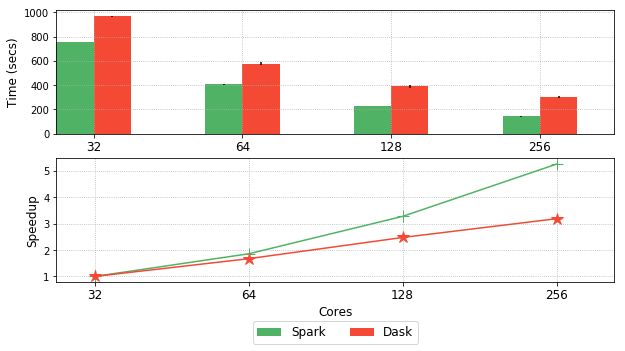

In [36]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=False)
fig.set_size_inches(8,5)
width = 0.5

spMeans.plot(kind='bar',x='Cores',y='Mean',yerr='Std',ax=axes[0],width=0.15,color=greens(150),position=1,legend=False,label='Spark')
daMeans.plot(kind='bar',x='Cores',y='Mean',yerr='Std',ax=axes[0],width=0.15,color=reds(150),position=0,legend=False,label='Dask')

spMeans.plot(kind='line',x='Cores',y='Speedup',ax=axes[1],color=greens(150),marker='+',legend=False, markersize=12,xticks=[32,64,128,256])
daMeans.plot(kind='line',x='Cores',y='Speedup',ax=axes[1],color=reds(150),marker='*',legend=False, markersize=12,xticks=[32,64,128,256])

axes[0].set_xticklabels(['32','64','128','256'], fontsize=12,rotation=0)
axes[0].set_ylabel('Time (secs)', fontsize=12)
axes[0].set_xlabel('Cores',fontsize=12)
axes[0].grid('on',which='both',linestyle=':')
axes[1].set_xlabel('Cores',fontsize=12)
axes[1].grid('on',which='both',linestyle=':')
axes[1].set_xlim([31,260])
axes[1].set_ylabel('Speedup', fontsize=12)
axes[1].set_xscale('log',basex=2)
axes[1].set_xticks([32,64,128,256])
axes[1].set_xticklabels(['32','64','128','256'],fontsize=12)
axes[0].legend(fontsize=12,bbox_to_anchor=(0., -1.7, 1,0), loc='lower center',ncol=3, borderaxespad=0.)
fig.savefig('spark_dask_lf_4M.pdf',dpi=800,bbox_inches='tight',pad_inches=0)
